In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df=pd.read_csv('./datasets/titanic/train.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['Age']=imp.fit_transform(df[['Age']])
imp2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Embarked']=imp2.fit_transform(df[['Embarked']])
enc=LabelEncoder()
df['Sex']=enc.fit_transform(df['Sex'])
df['Embarked']=enc.fit_transform(df['Embarked'])

In [29]:
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

<AxesSubplot:>

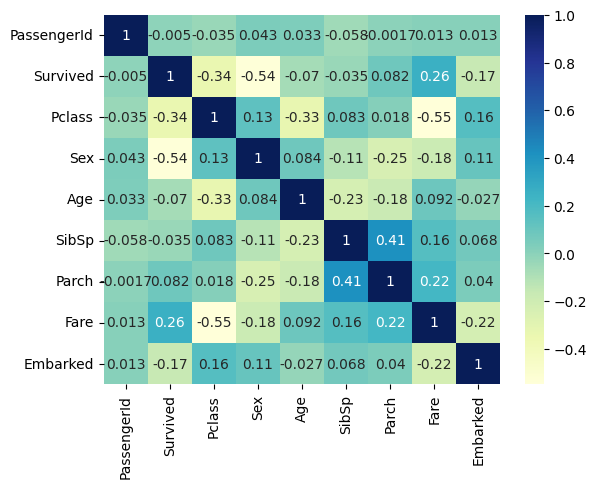

In [30]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [31]:
y=df['Survived']
X=df.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)
model=RandomForestClassifier()
model.fit(X,y)
y_pred=model.predict(X)

In [43]:

accuracy_score(y,y_pred)

0.9820426487093153

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
svc=SVC()
svc.fit(X,y)

SVC()

In [45]:
yp=svc.predict(X)
accuracy_score(y,yp)

0.8383838383838383

In [54]:
df2=pd.read_csv('./datasets/titanic/test.csv')
df2['Age']=imp.fit_transform(df2[['Age']])
df2['Fare']=imp.fit_transform(df2[['Fare']])
enc=LabelEncoder()
df2['Sex']=enc.fit_transform(df2['Sex'])
df2['Embarked']=enc.fit_transform(df2['Embarked'])

In [55]:
X_test=df2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [63]:
y_=model.predict(X_test)
ans=pd.DataFrame()
ans['PassengerId']=df2['PassengerId']
ans['Survived']=y_
ans.to_csv('ans.csv',index=False)

In [64]:
ans.shape

(418, 2)